In [30]:
import torch
import tensorboard as tb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

style.use('ggplot')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

In [31]:
# Import data from tensorboard logs
df_train = pd.read_csv('../data/run-train_val_train-tag-total_loss.csv')
df_train['Run'] = 'Train'

df_test = pd.read_csv('../data/run-train_val_test-tag-total_loss.csv')
df_test['Run'] = 'Validate'

df_all = df_train.append(df_test, ignore_index=True)
df_all = df_all.rename(columns={'Step': 'Epoch', 'Value': 'Loss'})
df_all

,Wall time,Epoch,Loss,Run
0,1.616888e+09,0,0.079162,Train
1,1.616888e+09,1,0.014763,Train
2,1.616888e+09,2,0.014928,Train
3,1.616888e+09,3,0.013971,Train
4,1.616888e+09,4,0.011923,Train
...,...,...,...,...
95,1.616888e+09,45,0.012189,Validate
96,1.616888e+09,46,0.008437,Validate
97,1.616888e+09,47,0.009539,Validate
98,1.616888e+09,48,0.010227,Validate


In [32]:
# Smoothing
SMOOTHING_CONSTANT = 0.6
df_all_smooth = df_all.copy(deep=True)
for i in range(1, 49):
    df_all_smooth.at[i, 'Loss'] = SMOOTHING_CONSTANT*df_all_smooth.at[i-1, 'Loss'] + (1-SMOOTHING_CONSTANT)*df_all_smooth.at[i, 'Loss']
for i in range(51, 99):
    df_all_smooth.at[i, 'Loss'] = SMOOTHING_CONSTANT*df_all_smooth.at[i-1, 'Loss'] + (1-SMOOTHING_CONSTANT)*df_all_smooth.at[i, 'Loss']

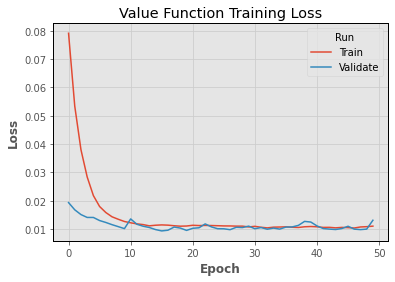

In [39]:
line_plot = sns.lineplot(data=df_all_smooth, x="Epoch", y="Loss", hue="Run").set_title("Value Function Training Loss")

In [41]:
fig = line_plot.get_figure()
fig.savefig('../img/value_fnc_train_loss.png', format='png', dpi=1200)